# MECA301 RESISTANCE DES MATERIAUX

## Tutoriel

In [3]:
# Quelques librairies
%matplotlib ipympl
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from MECA301 import Torseur

sp.init_printing(use_latex="mathjax")

### Introduction à SymPy

Ce TP utilise uniquement des outils libres (Open Source) liés au langage Python. Une librairie dédiée à nos problèmes de torseurs a été écrite pour l'occasion, c'est le fichier `MECA301.py`qui est dans le même dossier. Ce TP utilise beaucoup le module Sympy qui permet d'introduire du calcul formel dans Python. Voici donc quelques outils indispensables pour démarrer avec Sympy:

#### Symboles

In [4]:
a, b, c, x = sp.symbols(
    "a b c x", real=True
)  # Création d'une ou plusieurs variable littérale.
# Ici on spécifie que sont des réels
a, b, c, x

(a, b, c, x)

#### Expresssions et opérations 

In [5]:
y = (
    a * x**2 + b * x + c
)  # y est une expression qui dépend des variables créées précédement.
y.diff(x)  # On peut dériver par rapport à x

2⋅a⋅x + b

In [6]:
y.integrate(x)  # Une primitive

   3      2      
a⋅x    b⋅x       
──── + ──── + c⋅x
 3      2        

In [7]:
y.integrate((x, 0, 5)).simplify()  # Une intégrale entre 0 et 5

125⋅a   25⋅b      
───── + ──── + 5⋅c
  3      2        

In [8]:
z = y**3  # Une expression plus complexe
z

                3
⎛   2          ⎞ 
⎝a⋅x  + b⋅x + c⎠ 

In [9]:
z.expand()  # Développer

 3  6      2    5      2    4        2  4            3        2  2    3  3     ↪
a ⋅x  + 3⋅a ⋅b⋅x  + 3⋅a ⋅c⋅x  + 3⋅a⋅b ⋅x  + 6⋅a⋅b⋅c⋅x  + 3⋅a⋅c ⋅x  + b ⋅x  + 3 ↪

↪   2    2        2      3
↪ ⋅b ⋅c⋅x  + 3⋅b⋅c ⋅x + c 

#### Equations et résolution

In [10]:
eq1 = sp.Eq(y, 0)  # L'équation y = 0
eq1

   2              
a⋅x  + b⋅x + c = 0

In [11]:
sp.solve(eq1, x)  # Les solutions de l'équation !

⎡        _____________          _____________⎤
⎢       ╱           2          ╱           2 ⎥
⎢-b - ╲╱  -4⋅a⋅c + b    -b + ╲╱  -4⋅a⋅c + b  ⎥
⎢─────────────────────, ─────────────────────⎥
⎣         2⋅a                    2⋅a         ⎦

#### Applications numériques et tracés

In [12]:
# Utiliser des valeurs numériques:
y.subs(x, 5)  # On substitue une valeur une fois

25⋅a + 5⋅b + c

In [13]:
values = {
    a: 5.0,
    b: 4.0,
    c: 7.0,
}  # Une bonne manière de définie les valeurs numériques connues d'un coup
yv = y.subs(values)
yv

     2              
5.0⋅x  + 4.0⋅x + 7.0

In [14]:
yf = sp.lambdify(
    x, yv, "numpy"
)  # Une fonction vectorielle, c'est à dire applicable en N points d'un coup
xv = np.linspace(0.0, 1.0, 11)  # 11 valeurs de x équiréparties entre 0 et 1.
xv

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [15]:
yf(xv)  # Pratique !

array([ 7.  ,  7.45,  8.  ,  8.65,  9.4 , 10.25, 11.2 , 12.25, 13.4 ,
       14.65, 16.  ])

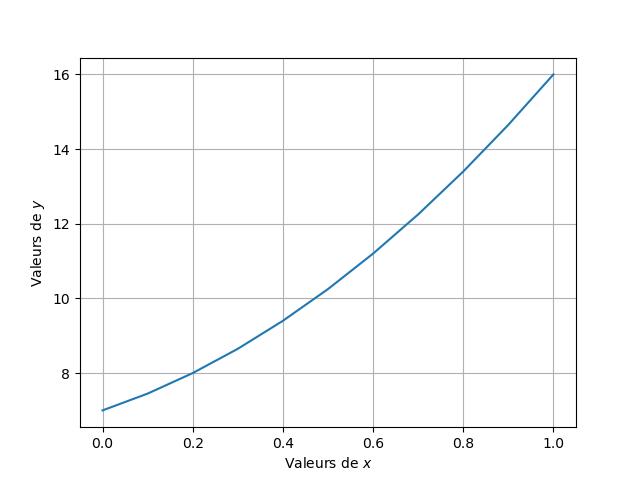

In [16]:
plt.figure()
plt.plot(xv, yf(xv))
plt.grid()
plt.xlabel("Valeurs de $x$")
plt.ylabel("Valeurs de $y$")
plt.show()

#### Fonctions et équations différentielles 

In [17]:
D, K, M = sp.symbols("D K M", real=True)  # Création de plusieurs variables littérales
f = sp.Function("f")(x)  # Création d'une fonction symbolique
f

f(x)

In [18]:
f.diff(x)  # Dérivée de la fonction symbolique

d       
──(f(x))
dx      

In [19]:
f.diff(x, 2)  # Dérivée seconde de f par rapport à x

 2       
d        
───(f(x))
  2      
dx       

In [20]:
eqd = sp.Eq(M * f.diff(x, 2) + D * f.diff(x) + K * f, 0)  # Une équation différentielle
eqd

                         2           
  d                     d            
D⋅──(f(x)) + K⋅f(x) + M⋅───(f(x)) = 0
  dx                      2          
                        dx           

In [21]:
sold = sp.dsolve(eqd, f)  # La solution générale de l'équation différentielle
sold

             ⎛        ____________⎞          ⎛       ____________⎞ 
             ⎜       ╱  2         ⎟          ⎜      ╱  2         ⎟ 
           x⋅⎝-D + ╲╱  D  - 4⋅K⋅M ⎠       -x⋅⎝D + ╲╱  D  - 4⋅K⋅M ⎠ 
           ────────────────────────       ─────────────────────────
                     2⋅M                             2⋅M           
f(x) = C₁⋅ℯ                         + C₂⋅ℯ                         

In [22]:
sold2 = sp.dsolve(
    eqd, f, ics={f.subs(x, 0): 0, f.diff(x).subs(x, 0): 1}
)  # Solution particulière avec conditions initiales
sold2

            ⎛        ____________⎞         ⎛       ____________⎞ 
            ⎜       ╱  2         ⎟         ⎜      ╱  2         ⎟ 
          x⋅⎝-D + ╲╱  D  - 4⋅K⋅M ⎠      -x⋅⎝D + ╲╱  D  - 4⋅K⋅M ⎠ 
          ────────────────────────      ─────────────────────────
                    2⋅M                            2⋅M           
       M⋅ℯ                           M⋅ℯ                         
f(x) = ─────────────────────────── - ────────────────────────────
                ____________                  ____________       
               ╱  2                          ╱  2                
             ╲╱  D  - 4⋅K⋅M                ╲╱  D  - 4⋅K⋅M        

### Introduction aux torseurs avec MECA301

In [23]:
F, L, x, XA, YA, NA = sp.symbols(
    "F L x X_A Y_A N_A", real=True
)  # Création des symboles
TF1 = Torseur(r=[0, -F, 0], p=[L, 0, 0])  # UN PREMIER TORSEUR
TF1

<Torseur: R=Matrix([[0], [-F], [0]]), M=Matrix([[0], [0], [0]]), P=Matrix([[L], [0], [0]])>

In [24]:
TF2 = Torseur(r=[XA, YA, 0], m=[0, 0, NA], p=[0, 0, 0])  # UN SECOND TORSEUR
TF2

<Torseur: R=Matrix([[X_A], [Y_A], [0]]), M=Matrix([[0], [0], [N_A]]), P=Matrix([[0], [0], [0]])>

In [25]:
# TRANSPORT DU TORSEUR 1
TF1 = TF1.transport([0, 0, 0])
TF1

<Torseur: R=Matrix([[0], [-F], [0]]), M=Matrix([[0], [0], [-F*L]]), P=Matrix([[0], [0], [0]])>

In [26]:
# APPLICATION DU PRINCIPE FONDAMENTAL DE LA STATIQUE
T_res = TF1 + TF2
T_res

<Torseur: R=Matrix([[X_A], [-F + Y_A], [0]]), M=Matrix([[0], [0], [-F*L + N_A]]), P=Matrix([[0], [0], [0]])>

In [27]:
# ECRITURE DES EQUATIONS NON TRIVIALES
PFS1 = T_res.assert_null_as_eq()
PFS1

[X_A = 0, -F + Y_A = 0, -F⋅L + N_A = 0]

In [28]:
# RESOLUTION DES EQUATIONS
SOL1 = sp.solve(PFS1, (NA, YA))
SOL1

{N_A: F⋅L, Y_A: F}